## Imports
Import pandas, numpy, matplotlib,and seaborn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup matplotlib inline
%matplotlib inline

## Data Overview

We will use the Ecommerce Customers CSV file provided by the company. This file contains information about customers, including details such as their Email, Address, and Avatar color. In addition to these, the file includes the following numerical columns:

* Avg. Session Length: The average duration of in-store style advice sessions.
* Time on App: The average time, in minutes, that customers spend using the mobile app.
* Time on Website: The average time, in minutes, that customers spend on the website.
* Length of Membership: The number of years a customer has been a member.

In [7]:
# Load the data
customers = pd.read_csv("Ecommerce Customers")

# Check data head, info and describe methods.
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Observations

The dataset consists of 500 entries with 8 columns, including categorical fields like Email, Address, and Avatar, along with numerical columns such as Avg. Session Length, Time on App, Time on Website, Length of Membership, and Yearly Amount Spent. The numerical data shows consistent patterns, with average session lengths around 33.05 minutes, app usage averaging 12.05 minutes, and website usage around 37.06 minutes. Customers have been members for an average of 3.53 years, and their yearly spending ranges from approximately  256.7 - 765.52 USD, with an average of $ 499.31. The data contains no missing values, suggesting it's well-prepared for analysis. The numerical consistency indicates regular customer behavior, which will help in building predictive models. 

# Data Analysis

Explore the correlation between the variables in the entire dataset

In [20]:
# Seaborn graphics setup
sns.set_palette("deep")
sns.set_style("white")

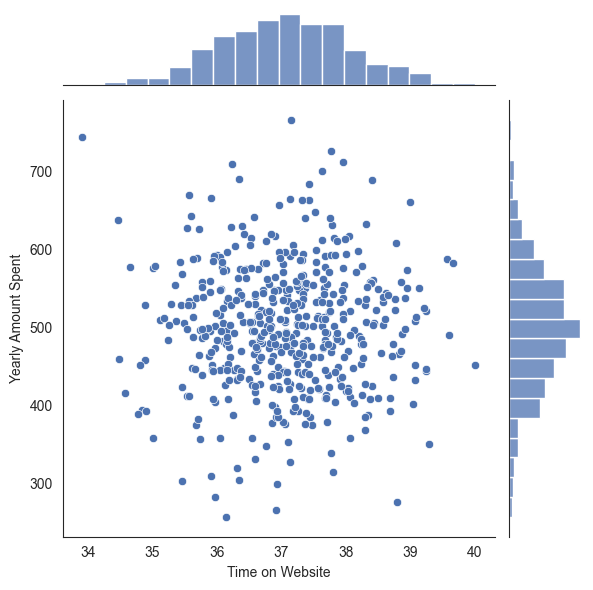

In [21]:
# Explore the relation beetween time on website and money spent yearly
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

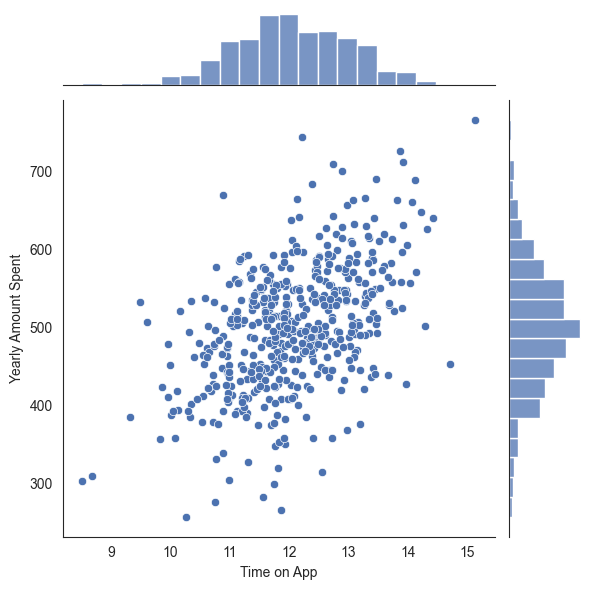

In [22]:
# Explore the relation beetween time on app and money spent yearly
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

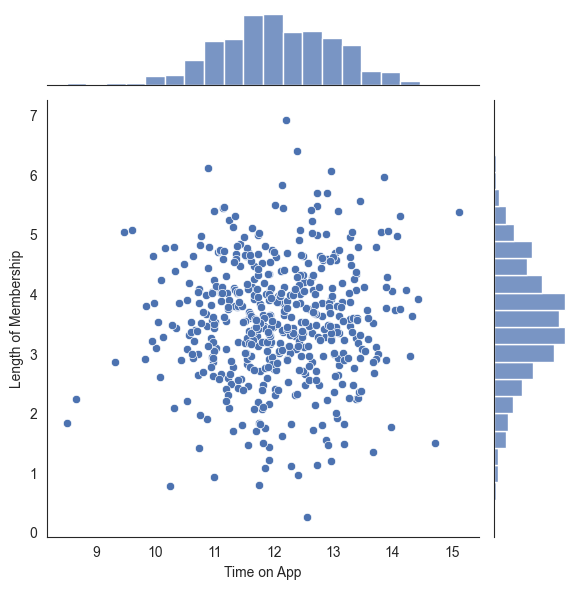

In [24]:
# Explore the relation beetween time on app and Length of Membership
sns.jointplot(x='Time on App',y='Length of Membership',data=customers)

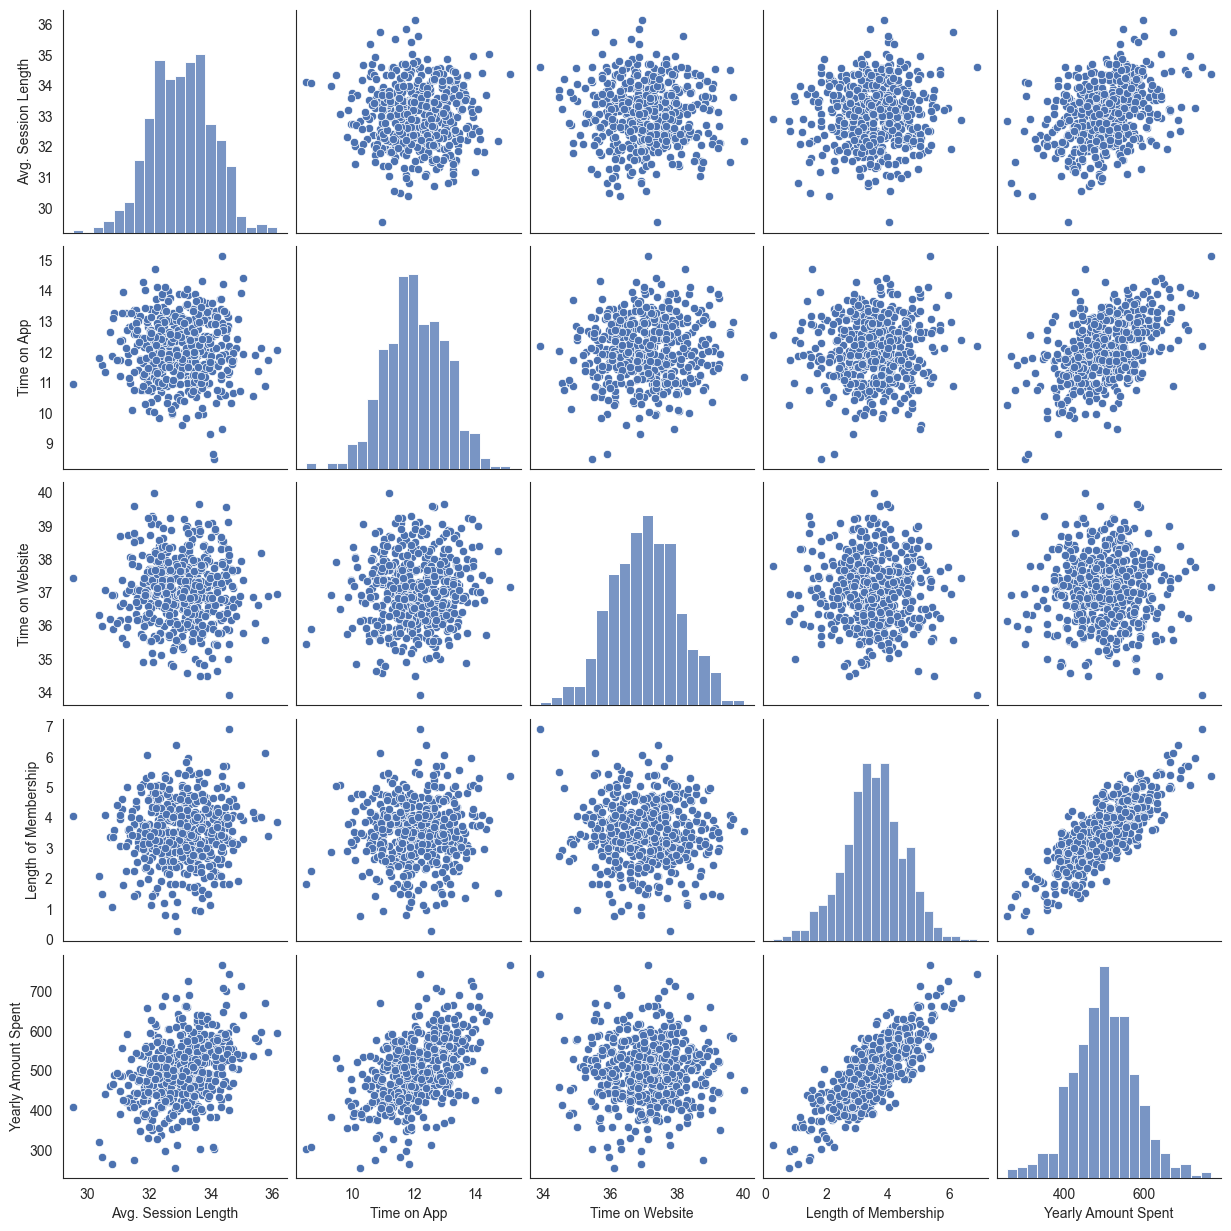

In [25]:
# Explore relations beetween the entire dataset
sns.pairplot(customers)

Based on the plot, the variable most strongly correlated with yearly amount spent is the Length of Membership.

## Training and Testing Data

After exploring the data, we will now split it into training and testing sets. 
Assign the numerical features of the customers to the variable X and the "Yearly Amount Spent" column to the variable y.

In [26]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Training the Model

In this case, we will train a linear regression model. This will help identify key drivers of spending, make predictions about future spending, and guide decisions on improving customer engagement and revenue.